In [3]:
import requests as r

In [18]:

data = {}
for year in range(14):
    year = year + 2002
    print year
    res = r.get('http://chicago.bnroths.com/data/eigs-chicago-zillow-S000/%s/1.json' % year).json()
    
    for a in res['data']:
        if a not in data:
            data[a] = []
        data[a].append(res['data'][a]['real'])

print data
    


2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


{u'Mayfair': [0.6, 1.2, 0.6, 0.9, 1.3, 1.4, 0.7, 0.8, 0.7, 0.9, 0.5, 0.5, 0.7, 0.7], u'Magnolia Glen': [0.4, 0.5, 0.8, 0.9, 0.7, 0.5, 0.6, 0.7, 0.4, 0.5, 0.7, 0.6, 0.4, 0.5], u'Kenwood': [1.0, 0.3, 0.3, 0.6, 0.3, 1.0, 1.0, 0.6, 0.5, 0.6, 0.3, 0.3, 0.4, 0.4], u'Grand Crossing': [0.9, 1.7, 1.7, 2.2, 1.6, 1.6, 0.9, 1.0, 1.3, 0.9, 1.4, 1.4, 1.1, 0.5], u'Jefferson Park': [10.7, 21.9, 12.0, 12.7, 8.3, 6.5, 9.4, 9.4, 6.9, 7.9, 6.3, 5.3, 4.4, 5.5], u'Sauganash Woods': [1.6, 2.2, 1.4, 2.0, 1.8, 3.1, 1.5, 1.0, 1.1, 1.2, 1.0, 1.1, 0.9, 1.3], u'Little Calumet River': [0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], u'Lake View East': [12.5, 17.3, 8.1, 9.2, 7.9, 8.2, 9.7, 9.2, 10.0, 7.9, 6.7, 8.2, 7.0, 10.4], u'East Chatham': [1.8, 0.5, 0.6, 0.6, 0.6, 0.4, 0.6, 0.3, 1.3, 2.4, 0.3, 0.4, 0.3, 0.1], u'Belmont Gardens': [3.5, 3.5, 3.8, 3.4, 2.7, 3.0, 1.5, 2.8, 1.8, 1.7, 2.8, 1.8, 1.3, 1.5], u'Park West': [4.6, 5.4, 6.5, 5.9, 5.8, 6.6, 6.9, 4.9, 4.9, 6.7, 8.6, 7.9, 5.7, 3.7], u'Fi

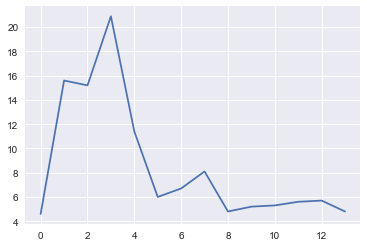

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.plot(data['Hyde Park'])
plt.plot(data['Gold Coast'])

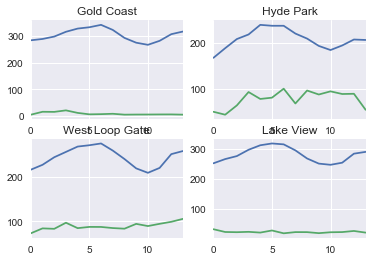

In [134]:
plt.figure(1)
plt.subplot(2,2,1)
for i, hood in enumerate(['Gold Coast', 'Hyde Park', 'West Loop Gate', 'Lake View']):
    plt.subplot(2,2,i+1)
    place = pd.DataFrame({
        'eigenvalues': data[hood], 
        'zillow': list(zillow[zillow.RegionName == hood].values)[0][1:]})
    place['zillow'].plot()
    place['eigenvalues'].plot(title=hood)

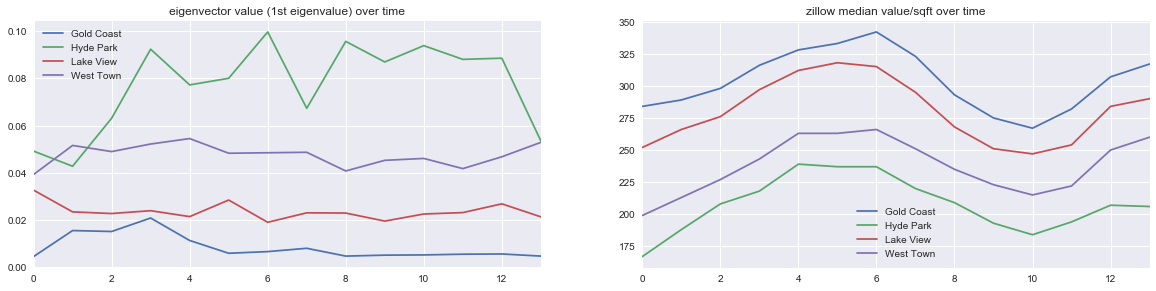

In [162]:
plt.figure(1, figsize=(20,10))
plt.subplot(2,2,1)
hoods = ['Gold Coast', 'Hyde Park', 'West Town', 'Lake View']
place = pd.DataFrame({
    hoods[0]: [x/1000 for x in data[hoods[0]]],
    hoods[1]: [x/1000 for x in data[hoods[1]]],
    hoods[2]: [x/1000 for x in data[hoods[2]]],
    hoods[3]: [x/1000 for x in data[hoods[3]]],
})
place.plot(ax=plt.gca(), title="eigenvector value (1st eigenvalue) over time")
plt.subplot(2,2,2)
place = pd.DataFrame({
    hoods[0]: list(zillow[zillow.RegionName == hoods[0]].values)[0][1:],
    hoods[1]: list(zillow[zillow.RegionName == hoods[1]].values)[0][1:],
    hoods[2]: list(zillow[zillow.RegionName == hoods[2]].values)[0][1:],
    hoods[3]: list(zillow[zillow.RegionName == hoods[3]].values)[0][1:]
})
place.plot(ax=plt.gca(), title="zillow median value/sqft over time")

In [118]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
y = np.asarray(place['zillow'])
x = np.asarray(place['eigenvalues'])
res = smf.OLS(y, x).fit()
print(res.summary())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [108]:
place['eigenvalues']

0      4.6
1     15.6
2     15.2
3     20.9
4     11.4
5      6.0
6      6.7
7      8.1
8      4.8
9      5.2
10     5.3
11     5.6
12     5.7
13     4.8
Name: eigenvalues, dtype: float64

In [36]:
import pandas as pd
zillow = pd.read_csv('Neighborhood_MedianValuePerSqft_AllHomes.csv')

In [67]:
zillow = zillow[(zillow.City == 'Chicago')][[
    'RegionName',
    '2002-01',
    '2003-01',
    '2004-01',
    '2005-01',
    '2006-01',
    '2007-01',
    '2008-01',
    '2009-01',
    '2010-01',
    '2011-01',
    '2012-01',
    '2013-01',
    '2014-01',
    '2015-01']]